In [1]:
import sys
from SLGCA_Bach import SLGCA
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
os.environ['R_HOME'] = '/home/luxin1/miniconda3/envs/pytorch/lib/R'

In [2]:
n_clusters = 7
file_fold = '/home/luxin1/ST-DATA/DLPFC/'
sample_list = ['151675', '151676']

load: 151675
151675 load label done
151675 filter NA done
151675 build local graph done
load: 151676
151676 load label done
151676 filter NA done
151676 build local graph done
load all slices done
merge done
whole graph constructed
Begin to train ST data...


100%|██████████| 500/500 [01:02<00:00,  7.96it/s]


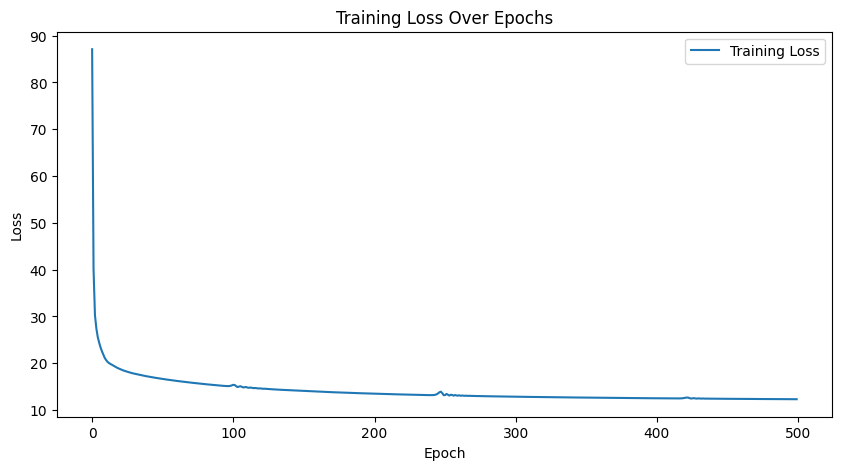

Training completed for Stereo ST data!


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


In [3]:
model = SLGCA(path=file_fold, sample_list=sample_list, n_top_genes=3000, dim_output=512, n_neighbors=5,
                              alpha=10, beta=0.5, gama=0.5,label=True)
adata = model.train()
from utils import clustering
radius = 50
clustering(adata, n_clusters=n_clusters, method='mclust', radius=radius, refinement=True)

In [4]:
ARI = np.round(metrics.adjusted_rand_score(adata.obs['SLGCA'], adata.obs['ground_truth']), 2)
NMI = np.round(metrics.normalized_mutual_info_score(adata.obs['SLGCA'], adata.obs['ground_truth']), 2)
print(ARI, NMI)

0.61 0.7
